# 제3 고지 : 고차 미분 계산
## STEP 29 : 뉴턴 방법으로 푸는 최적화(수동 계산)

이전 단계에서 로젠브록  함수의  최솟값을 경사하강법으로 구현했는데, 일반적으로 **수렴이 느리다는 것(=많은 반복횟수를 진행했다는것)**을 확인할 수 있었다.  
이를 대체하기 위해 여러가지 방법들이 있지만, 그 중 가장 유명한 방법이 `Newton's method` 이다.  

<p align='center'>
    <img src='../assets/%EA%B7%B8%EB%A6%BC%2029-1.png' align='center' width='32%'>
</p>

위의 그림에서 볼 수 있듯이, `Newton's method` 를 사용하게 되면 오른쪽 그림과 같이 더 적은 단계로 최적의 결과를 얻을 수 있다.
(물론, 초깃값/학습률 등 의 따라 결과가 달라져 이렇게 큰 차이를 볼 수 없는 경우도 있겠지만 일반적으로 초깃값이 정답에 충분히 가까우면 `Newton's method` 가 더 빨리 수렴한다.)

### 29.1 뉴턴 방법을 활용한 최적화 이론 
 
이해를 돕기위해 하나의 변수를 가지는$ y=f(x)$  함수의 최솟값을 구하는 문제를 생각해보자. 뉴턴 방법으로 최적화 하기 위해서는 테일러 급수에 따라 다음과 같이 변환한다.

<p align='center'>
    <img src='../assets/%EC%8B%9D%2029.1.png' align='center' width='50%'>
</p>

테일러 급수에 따라 어떤 $a$점을 기점으로 $f$ 를 $x$의 다항식으로 나타낼 수 있으며, 증가하는 항을 어느 시점 중단하면 $f(x)$를 근사적으로 나타낼 수 있다. 여기에서는 아래와 같이 2차미분에서 중단하여 표현하겠다.

<p align='center'>
    <img src='../assets/%EC%8B%9D%2029.2.png' align='center' width='50%'>
</p>

<p align='center'>
    <img src='../assets/%EA%B7%B8%EB%A6%BC%2029-2.png' align='center' width='50%'>
</p>

위의 그림과 같이 근사한 2차 함수는 $x=a$ 에서 $y=f(x)$에 접하는 곡선이다. 이차함수의 최솟값을 해석적으로 구하면 다음 수식과 같다.

<p align='center'>
    <img src='../assets/%EC%8B%9D%2029.3.png' align='center' width='50%'>
</p>


위 결과로 근사한 2차함수의 최솟값은 $x=a-\frac{f'(a)}{f''(a)}$ 임을 알 수 있으며, 이는 $a$의 위치를 다음과 같이 $-\frac{f'(a)}{f''(a)}$  갱신하면 된다.

<p align='center'>
    <img src='../assets/%EA%B7%B8%EB%A6%BC%2029-3.png' align='center' width='50%'>
</p>

이제 경사하강법과 뉴턴 방법을 비교하여 특성을 파악하면 다음과 같다.

1. 경사하강법은 $\alpha$ 를 사람이 **수동으로 설정하고 $x$를 갱신**한다.
2. 뉴턴 방법은 $\alpha=\frac{1}{f''(x)}$ 로 **자동으로 설정하고 $x$를 갱신**한다.

<p align='center'>
    <img src='../assets/%EC%8B%9D%2029.4.png' align='center' width='50%'>
    <img src='../assets/%EC%8B%9D%2029.5.png' align='center' width='50%'>
</p>

(물론, 지금까지 함수의 입력이 '스칼라' 일때의 뉴턴방법을 설명했는데, '벡터'인 경우에도 가능하다. 차이점은 **1차 미분으로 `gradient`를 사용**하고, **2차미분으로 `Hessian matrix`를 사용**하는 점이다.)


### 29.2 뉴턴 방법을 활용한 최적화 구현

<p align='center'>
    <img src='../assets/%EA%B7%B8%EB%A6%BC%2029-4.png' align='center' width='50%'>
</p>

이제 구체적인 문제 $y=x^4-2x^2$에 대해 뉴턴 방법을 구현해보자. 하지만 현재 DeZero는 2차미분은 자동으로 구하지 못하기 때문에 다음과 같이 직접 구하기로 하자.
$$
\begin{aligned}
y&=x^4-2x^2 \\ 
\frac{\partial y}{\partial x} &= 4x^3-4x \\
\frac{\partial^2 y}{\partial x^2} &= 12x^2-4 \\
\end{aligned}
$$

(참고로, 최솟값을 가지는 포인트는 $x=1$ 이다.)

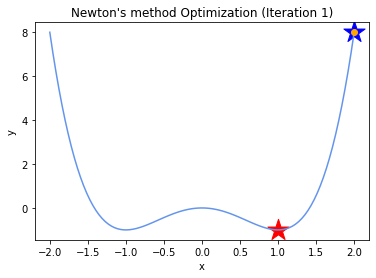

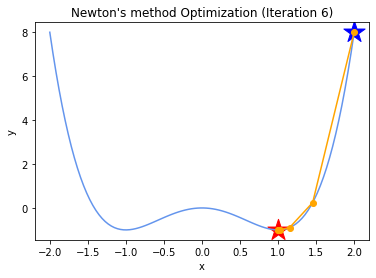

In [21]:
import sys

sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from dezero import Variable

%matplotlib inline

def f(x):
    y = x ** 4 - 2 * x ** 2 
    return y 

def gx2(x):
    return 12 * x **2 -4 

# 초기 포인트 설정
x =  Variable(np.array(2.0))

# TODO: 임의로 반복횟수를 바꿔 확인해 보자. 
iters = 10 


log_interval = 5 # 그래프 인터벌 

# 포인트 이동 정보
x_history = []  
y_history = []

for i in range(iters):
    # 현재 포인트를 이력에 추가

    y= f(x)
    
    x_history.append(x.data.item())
    y_history.append(y.data.item())
    
    

    # Init grad
    x.cleargrad()

    # backpropagation
    y.backward()

    # Newton's method
    x.data = x.data - x.grad / gx2(x.data)
    
    if i % log_interval ==0:
        # 그래프 업데이트
        plt.clf()
        # Rosenbrock 함수의 등고선 플롯만 그리기
        x_range = np.linspace(-2, 2, 100)
        y_range = f(x_range)
            
        # 현재 포인트 표시 및 선으로 연결
        plt.scatter([2.0], [f(2.0)],marker="*", color="blue",s=500) # plotting single point
        plt.scatter([1.0], [f(1.0)],marker="*", color="red",s=500) # target point 
        plt.plot(x_range, y_range,color="cornflowerblue")
        plt.plot(x_history,y_history,'o-',color="orange")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Newton\'s method Optimization (Iteration {i+1})')
        
        plt.pause(0.01)  # 잠시 멈춤

plt.show()